In [1]:
import pandas as pd
df = pd.read_csv("data/carprices.csv")
display(df)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


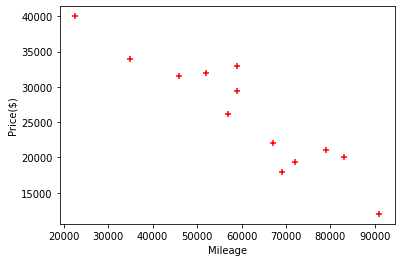

In [2]:
import matplotlib.pyplot as plt
plt.xlabel("Mileage")
plt.ylabel("Price($)")
plt.scatter(df["Mileage"], df["Sell Price($)"], marker="+", color="red")
plt.show()

In [3]:
dummies = pd.get_dummies(df["Car Model"], drop_first=True) # drop_first to avoid dummies variable trap
display(dummies)

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [4]:
final = pd.concat([df, dummies], axis='columns').drop('Car Model', axis='columns')
display(final)

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [5]:
X = final.drop('Sell Price($)', axis='columns')
display(X)

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [6]:
y = final['Sell Price($)']
display(y)

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print("Prediction #1", model.predict([[45000, 4, 0, 1]]))
print("Prediction #2", model.predict([[86000, 7, 1, 0]]))
print("Prediction #3", model.predict([[62000, 6, 0, 0]]))
print("Score", model.score(X, y))

Prediction #1 [36991.31721061]
Prediction #2 [11080.74313219]
Prediction #3 [25580.79361352]
Score 0.9417050937281083
